## Загрузка исходных данных и изучение общей информации

### Импортируем все необходимые нам бибилиотеки и модули

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp 
from scipy import stats as st

pd.options.display.max_columns = None 


### Загрузим исходные данные и сохраним их в датафрейм

In [2]:
data = pd.read_csv('/datasets/games.csv')


### Оценим первоначальный датасет 

In [3]:
data.info()
data.sample(n = 10, random_state = 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12533,Genkai Tokki: Moero Crystal,PSV,2015.0,Role-Playing,0.00,0.00,0.06,0.00,NaN,NaN,NaN
2959,Prince of Persia: The Forgotten Sands,PS3,2010.0,Action,0.19,0.36,0.01,0.12,75.0,7.6,T
4394,Transformers: Revenge of the Fallen (Wii & PS2...,DS,2009.0,Action,0.26,0.14,0.00,0.04,NaN,NaN,NaN
11729,One Piece: Gear Spirit,DS,2007.0,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,NaN
8742,Saturn Bomberman,SAT,1996.0,Puzzle,0.00,0.00,0.15,0.00,NaN,NaN,NaN
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.00,0.14,NaN,NaN,NaN
15316,Casper's Scare School: Classroom Capers,DS,2008.0,Adventure,0.02,0.00,0.00,0.00,NaN,tbd,E
7923,Kuma-Tomo,3DS,2013.0,Misc,0.00,0.00,0.19,0.00,NaN,NaN,NaN
10753,King of Clubs: Mini Golf,Wii,2008.0,Sports,0.09,0.00,0.00,0.01,NaN,NaN,NaN
6808,G-Police,PS,1997.0,Action,0.13,0.09,0.00,0.02,NaN,NaN,NaN


### Вывод: 

Имеющиеся данные требуют предобработки, а именно - перевод в нижний регистр названия колонок, изменение типа данных в столбцах : Year_of_Release с float64 на int,  User_Score с object на float64, также нужно изучить природу появления пропусков и необходимость их заполнения. 

## Подготовим данные

### Переведем названия столбцов и их значения в нижний регистр:

После перевод проверим, что у нас получилось: 

In [4]:
data.columns = map(str.lower, data.columns)
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Переведем в нужные типы столбцы 

Значения столбца "год выпуска" (year_of_release) имеют пропуски, которые возникли в результате ошибки оператора или же в результате ошибки при автоматической выгрузке. Ну или же год выпуска игры точно не известен. Заменим пустые значения на 0, для того, чтобы мы могли перевести данные в столбце в нужный нам тип.

In [5]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Разберемся с аббревиатурой tbd в столбце с пользовательским рейтингом. tbd(англ. - to be determined) - дословно - будет поределен. Это значение означает что рейтинг еще не определен. Таким образом, можно заполнить эти строки значением NaN. Так как столбец с рейтингом должен иметь числовой тип float(число с плавающей запятой).Таким образом заменим на NaN значения tbd и переведем в числовой вид данный столбец: 

In [6]:
data['user_score'] = data['user_score'].replace('tbd', 'NaN')
data['user_score'] = data['user_score'].astype('float')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Определим причины появления пропусков и необходимость их заполнения

Как видно из описания датафрейма у нас не хватает двух записей с именами игры(name), эти строки можно удалить. Пропуски в этих столбцах могли появиться ввиду невнимательности оператора или же ошибки автоматической выгрузки. Удалив две эти строки данные не будут сильно искажены. При этом мы убираем строки в занчении ключевого столбца пропущенное значение( в адльнейшем обработка этих строк невозможна, потому как нельзя идентифицировать игру.

In [7]:
data = data.dropna(subset = ['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Посчитаем итоговые продажи игр во всем мире

Для этого создадим новый столбец all_sales значения которого будут равны построчной сумме продаж по регионам: 

In [8]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
5020,tokimeki memorial: forever with you,sat,1996,simulation,0.00,0.00,0.38,0.00,NaN,NaN,NaN,0.38
13383,winter sports 3: the great tournament,wii,2010,sports,0.02,0.02,0.00,0.00,NaN,NaN,NaN,0.04
14171,care bears - care quest,gba,2005,action,0.02,0.01,0.00,0.00,NaN,NaN,NaN,0.03
13159,all star tennis 99,n64,1999,sports,0.04,0.01,0.00,0.00,NaN,NaN,NaN,0.05
12570,foster's home for imaginary friends: imaginati...,ds,2007,adventure,0.06,0.00,0.00,0.00,NaN,7.2,E,0.06
7035,musou orochi z,ps3,2009,action,0.00,0.00,0.23,0.00,NaN,NaN,NaN,0.23
2540,army men: sarge's heroes,n64,1999,action,0.68,0.12,0.00,0.01,NaN,NaN,NaN,0.81
13418,big air freestyle,gc,2002,racing,0.04,0.01,0.00,0.00,56.0,NaN,T,0.05
6953,super robot taisen d,gba,2003,strategy,0.00,0.00,0.23,0.01,NaN,NaN,NaN,0.24
5491,battletanx,n64,1998,action,0.26,0.06,0.00,0.00,NaN,NaN,NaN,0.32


### Вывод: 
Как видно после удаления двух строк без названия игры в основных колонках осталось 16713. Сразу нужно отметить, что помимо название в удаленных нами играх не были заполнены значения столбца "жанр игры"(genre). 

Заполнять пропуски в значениях рейтинга, помимо уже заполненных tbd мы не будем, так как их заполнение средними или медианными значениями приведет к искажению данных.

В дальнейшем нам будет достаточно тех значений столбцов с рейтингом которые у нас имеются.

Также мы посчитали мировые продажи игр и сохранили их в отдельном столбце.


## Проведем исследовательский анализ данных

### Посмотрим сколько игр выпускалось в разные годы. Определим важны ли данные за все периоды

Для этого сгруппируем игры по годам и посчитаем их количество:

In [9]:
game_group = data.pivot_table(
    index = 'year_of_release',
    values = 'name', 
    aggfunc = 'count').reset_index().sort_values(
    by = 'year_of_release', ascending = False)
print(game_group)

    year_of_release  name
37             2016   502
36             2015   606
35             2014   581
34             2013   544
33             2012   653
32             2011  1136
31             2010  1255
30             2009  1426
29             2008  1427
28             2007  1197
27             2006  1006
26             2005   939
25             2004   762
24             2003   775
23             2002   829
22             2001   482
21             2000   350
20             1999   338
19             1998   379
18             1997   289
17             1996   263
16             1995   219
15             1994   121
14             1993    60
13             1992    43
12             1991    41
11             1990    16
10             1989    17
9              1988    15
8              1987    16
7              1986    21
6              1985    14
5              1984    14
4              1983    17
3              1982    36
2              1981    46
1              1980     9
0           

#### Вывод: 
Как видно из таблицы - по годам выпуска - до 1994 года, выпускалось менее 100 популярных игр в год. Расцвет игровой индустрии пришелся на период с 2006 по 2011 годы, когда количество выпускаемых игр привышало 1000 штук в год. Затем произошел резкий спад более чем в два раза. 

### Посмотрим, как менялись продажи по платформам

Для этого построим аналогичную вышеприведенной таблице, только сгруппируем значения по платформе и проссумируем продажи мировые продажи:


In [10]:
game_platform = data.pivot_table(
    index = 'platform',
    values = 'all_sales', 
    aggfunc = 'sum').sort_values(
    by = 'all_sales',ascending = False)
print(game_platform)

          all_sales
platform           
ps2         1255.77
x360         971.42
ps3          939.65
wii          907.51
ds           806.12
ps           730.86
gba          317.85
ps4          314.14
psp          294.05
pc           259.52
3ds          259.00
xb           257.74
gb           255.46
nes          251.05
n64          218.68
snes         200.04
gc           198.93
xone         159.32
2600          96.98
wiiu          82.19
psv           54.07
sat           33.59
gen           28.35
dc            15.95
scd            1.86
ng             1.44
ws             1.42
tg16           0.16
3do            0.10
gg             0.04
pcfx           0.03


Выделим платформы с наибольшими суммарными продажами(будем считать количество суммарных продаж более 10 млн. проданных копий на платформу) и сохраним их в переменной top_games_sales:

In [11]:
top_games_sales = game_platform.query('all_sales >= 10')
print(top_games_sales)

          all_sales
platform           
ps2         1255.77
x360         971.42
ps3          939.65
wii          907.51
ds           806.12
ps           730.86
gba          317.85
ps4          314.14
psp          294.05
pc           259.52
3ds          259.00
xb           257.74
gb           255.46
nes          251.05
n64          218.68
snes         200.04
gc           198.93
xone         159.32
2600          96.98
wiiu          82.19
psv           54.07
sat           33.59
gen           28.35
dc            15.95


Сделаем срез данных в который попадут лишь топовые по продажам платформы и сгруппируем по годам, а также просуммируем продажи:

In [ ]:
top_platform_sales = data.query('platform in @top_games_sales.index')
top_platform_year = top_platform_sales.pivot_table(
    index = 'year_of_release', columns = 'platform', 
    values = 'all_sales', aggfunc = 'sum').reset_index()


top_platform_year.plot.bar(
    y=['2600',
       '3ds',
       'dc',
       'ds',
       'gb',
       'gba',
       'gc',
       'gen',
       'n64',
       'nes',
       'pc',
       'ps',
       'ps2',
       'ps3',
       'ps4',
       'psp',
       'psv',
       'sat',
       'snes',
       'wii',
       'wiiu',
       'x360',
       'xb',
       'xone'], x='year_of_release',
    figsize = (15,20), grid = True, 
    subplots = True)


plt.subplots_adjust(wspace=0, hspace=0)


plt.xlabel('Год')
plt.ylabel('Суммарные продажи')

plt.tick_params(
    axis='y',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False)


plt.show()

#### Вывод: 

Распределние продаж по годам в зависимости от платформы имеет нормальную форму. Характерный срок появления новых и исчезновения старых составляет 3 года. 

### Возьмем данные за соответствующий актуальный период 

Актуальный период в нашем случае равен - 5 лет. Для оценки платформ в актуальный период - создадим график с учетом только лишь актуального периода(при этом возьмем данные  с поправкой, что за 2016 год данные могут быть неполными):

Text(0, 0.5, 'Суммарные продажи')

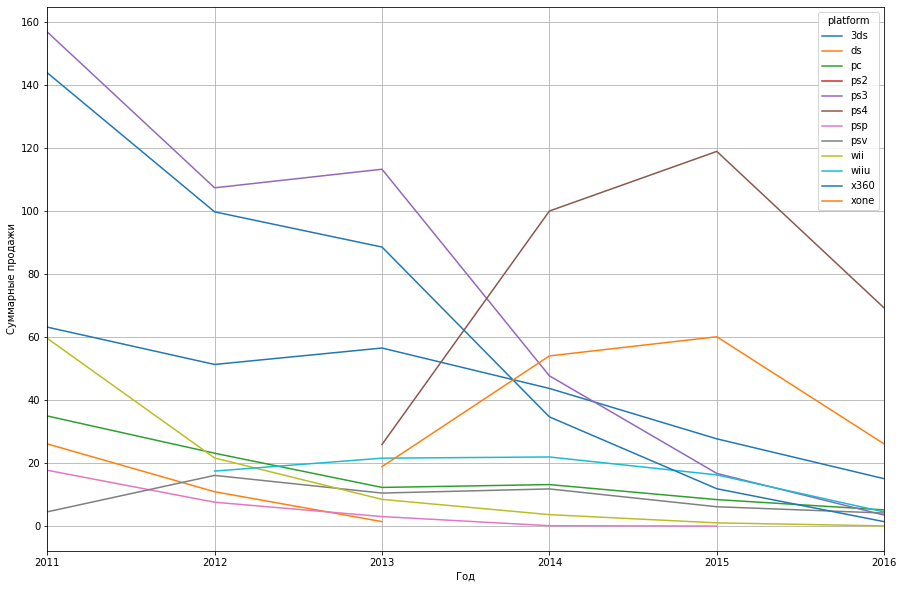

In [13]:
top_platform_year_act = top_platform_year.query('year_of_release >= 2011')

top_platform_year_act.plot.line(
    y=['3ds',
       'ds',
       'pc',
       'ps2',
       'ps3',
       'ps4',
       'psp',
       'psv',
       'wii',
       'wiiu',
       'x360',
       'xone'], x='year_of_release',
    figsize = (15,10), grid = True)


plt.xlabel('Год')
plt.ylabel('Суммарные продажи')

#### Вывод:

Как видно из графиков приведенных выше и учитывая тот факт, что за 2016 год данные могут быть неполными, поэтому будем учитывать данные с 2011 по 2015 годы. Как видно из распределения - тройка лидеро по продажам 1 место - sony ps4, 2 место - xbox one, 3 место - xbox 360. Есть основания полагать, что продажи ps4 и xbox one идут вверх, снижаются же продажи у платформ nintendo 3ds, xbox 360, sony ps3. 

На 2017 год с большей долей вероятности будут расти продажи sony ps4 и xbox one, также еще актуальной будет платформа xbox 360, персональные компьютеры (pc) имеют линейное распределние, также популярна консоль nintendo wii u.  Выберем их в качестве перспективных. 

### Построим графики "ящик с усами" для перспективных платформ. 


Text(0.5, 0, 'Платформа')

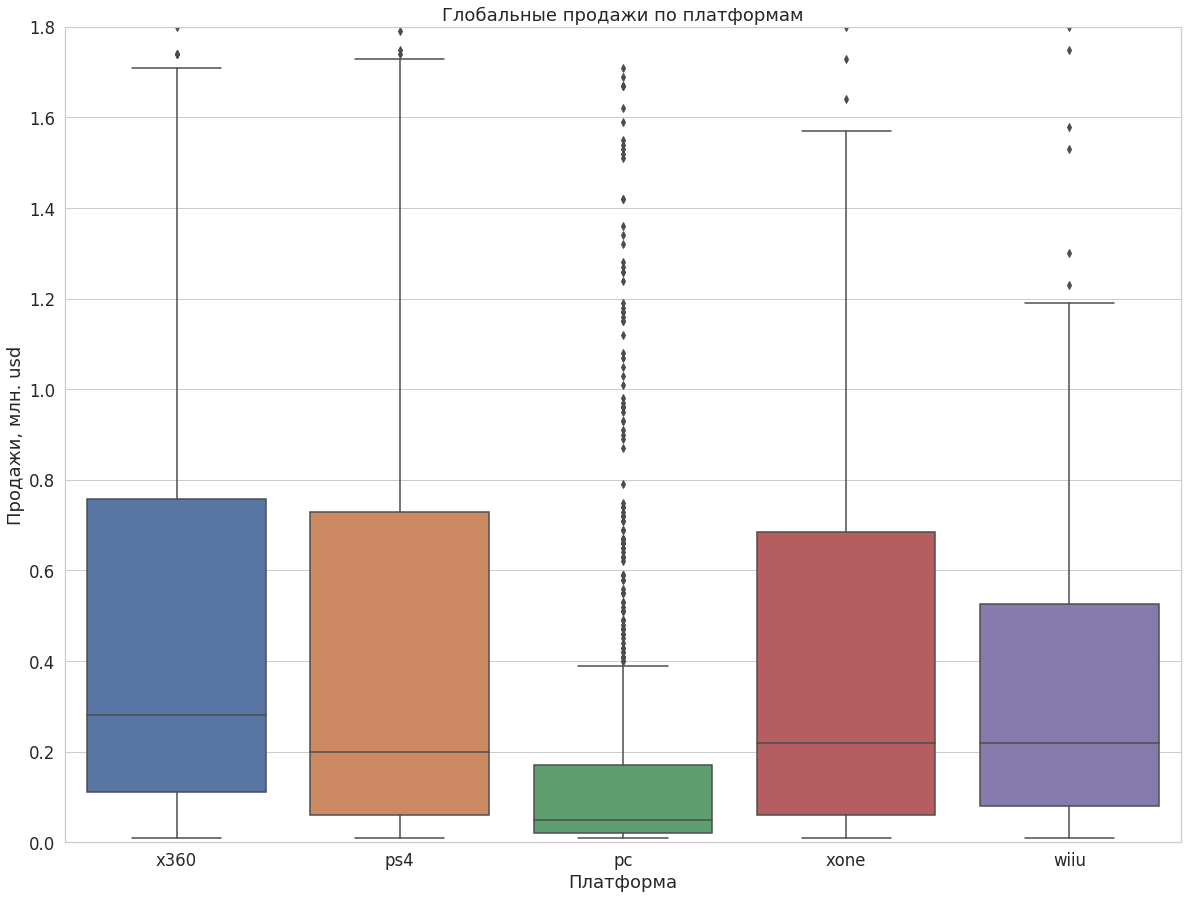

In [14]:
platform_perspekt = ['ps4','xone','x360','pc', 'wiiu']

data_perspekt = data[data['platform'].isin(platform_perspekt)]

sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.5, style='whitegrid')

ax = sns.boxplot(x = "platform",
                 y = "all_sales",
                 data = data_perspekt, 
                 )
plt.ylim(0, 1.8)
plt.title('Глобальные продажи по платформам')
plt.ylabel('Продажи, млн. usd')
plt.xlabel('Платформа')


#### Вывод: 

Как видно из графиков, медиана у Xbox 360 и Xbox one, находятся выше нежели у PS4. Это говорит о том, что продажи игр на эти приставки  принесли производителям больше денег. И хотя из линейного графика продаж следует, что лидером является сони плэйстейшен 4, однако же ящрик с усами не обмануть - медиана у этой платформе немного ниже, чем у приставки wiiu(z впервые тут о ней услышал, а плойка у всех на слуху). Продажи игр на pc  же демонстрирует хоть и не такой взярвной рост, однако же как мы помним из распредения - pc игры популярны намного более продолжительное время, нежели все остальные платформы. PC - своего рода облигация, которая приносит не столь большой, но зато стабильный доход.

Но это все актуально, если рассматривать данные только по 2016 год. Как известно, следующая платформа ps5 была выпущена в 2020 году в ноябре. И соответственно, ps4 добрала недостающие продажи за счет того, что она присутствовала на рынке в безальтернативной версии еще 5 лет. 


### Оценим влияние отзывов на продажи внутри одной популярной платформы

Для этого построим диграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для того чтобы выделить отдельную платформу создадим срез данных и сохраним его в переменной. 


Text(0.5, 0, 'Оценка пользователей')

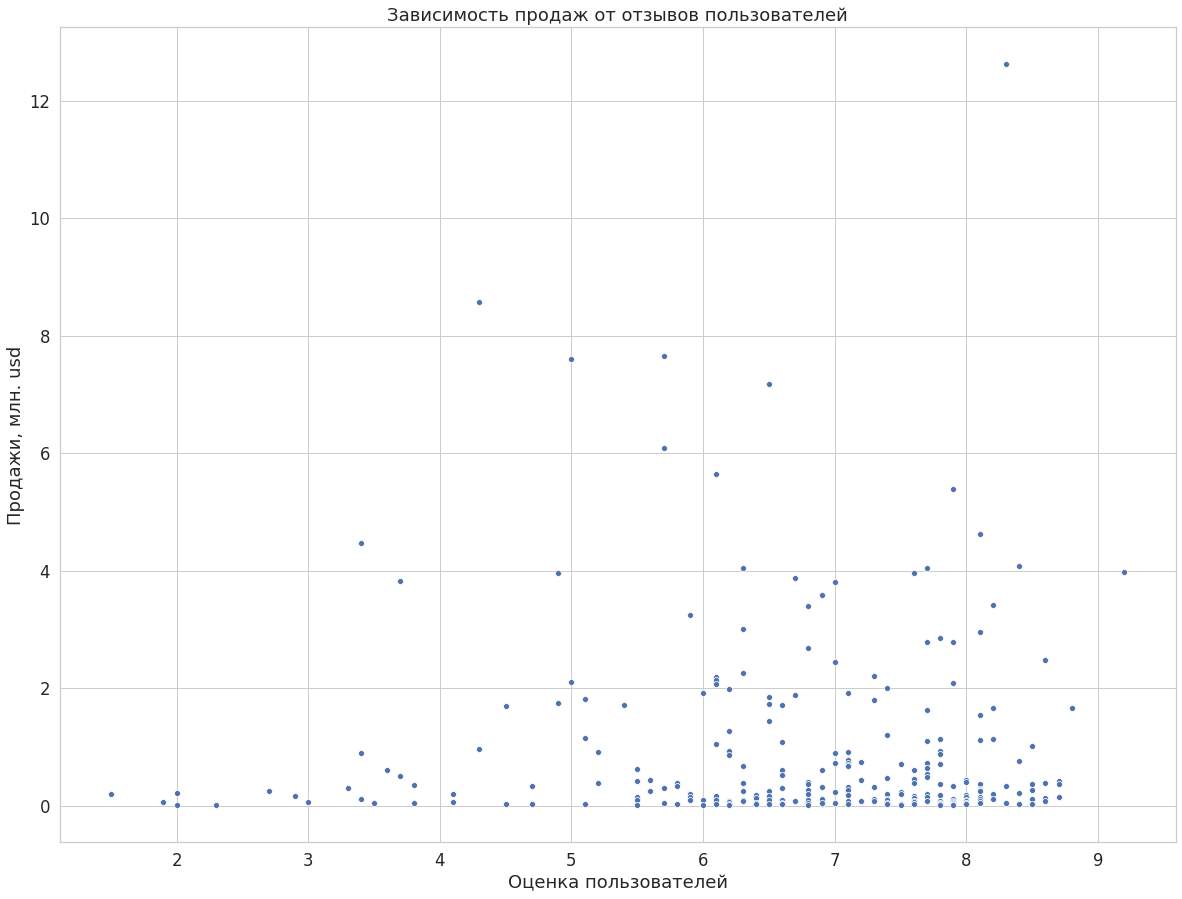

In [15]:
ps4_data = data.query('platform == "ps4" and year_of_release >= 2011')
sns.scatterplot(data = ps4_data, x = 'user_score', y = 'all_sales')
plt.title('Зависимость продаж от отзывов пользователей')
plt.ylabel('Продажи, млн. usd')
plt.xlabel('Оценка пользователей')

Построим таблицу коорреляции с помощью зеленого градиента:

In [16]:
(ps4_data
 .corr()['all_sales']
 .to_frame()
 .sort_values('all_sales', ascending = False)
 .style
 .background_gradient(cmap = 'Greens')
)

,all_sales
all_sales,1
other_sales,0.998051
eu_sales,0.958157
na_sales,0.92816
jp_sales,0.527129
critic_score,0.406568
user_score,-0.0319571
year_of_release,-0.235032


#### Вывод: 

Как видно из графика, продажи зависят от отзывов пользователей не линейно, рост продаж начинается при нахождении оценки пользоваетлей выше 5,5 баллов, максимум же значений глобальных продаж находятся между 7 и 8 баллами.

Коэффициент корреляции Пирсона отражает нелинейность связи между продажами и рейтингом пользователей - как видно из таблицы, имеется слабая отрицательная связь(что конечно же не отражает действительности, так как отрицательная связь подразумевает, что с ростом одной величины уменьшается другая, а у нас же исходя из графика с ростом рейтинга растут продажи) 

Корреляция же между отзывами критиков и продажами более линейна и сильна, что тоже видно из таблицы. 

### Соотнесем полученные выводы с продажами на других платформах 

Для этого создадим датасет в который вощли все остальные платформы кроме ps4 и построим график а также таблицу с коэффициентом корреляции:  

Text(0.5, 0, 'Оценка пользователей')

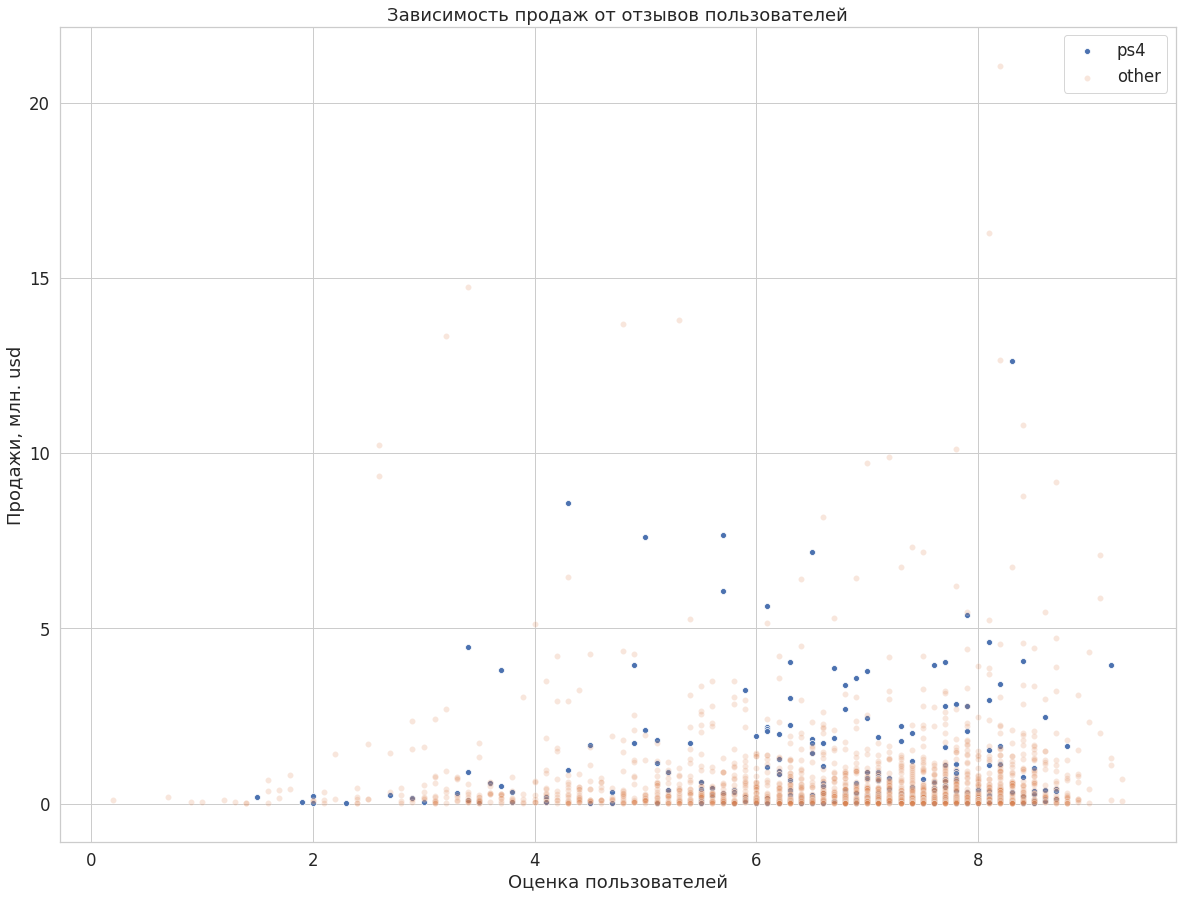

In [17]:
other_platform_data =  data.query('platform != "ps4" and year_of_release >= 2011')

    
#Заменим значения в столбце platform в полученном датасете на "other" для красивого выда на графике легенды 

sns.scatterplot(data = ps4_data, x = 'user_score', 
                y = 'all_sales', label = 'ps4',
               )

plt.title('Зависимость продаж от отзывов пользователей')
plt.ylabel('Продажи, млн. usd')
plt.xlabel('Оценка пользователей')

sns.scatterplot(data = other_platform_data,
                x = 'user_score', y = 'all_sales',
                label = 'other',
               alpha = 0.2, 
                             )

plt.title('Зависимость продаж от отзывов пользователей')
plt.ylabel('Продажи, млн. usd')
plt.xlabel('Оценка пользователей')

Сравним таблицы корреляции для ps4 и  других платформ: 


In [18]:
(ps4_data
 .corr()['all_sales']
 .to_frame()
 .sort_values('all_sales', ascending = False)
 .style
 .background_gradient(cmap = 'Greens')
)

,all_sales
all_sales,1
other_sales,0.998051
eu_sales,0.958157
na_sales,0.92816
jp_sales,0.527129
critic_score,0.406568
user_score,-0.0319571
year_of_release,-0.235032


In [19]:
(other_platform_data
 .corr()['all_sales']
 .to_frame()
 .sort_values('all_sales', ascending = False)
 .style
 .background_gradient(cmap = 'Greens')
)


,all_sales
all_sales,1
eu_sales,0.934284
na_sales,0.934087
other_sales,0.901629
jp_sales,0.474154
critic_score,0.316886
user_score,0.0396633
year_of_release,-0.0621615


#### Вывод: 

Как видно из графика, в целом на других платформах зависимость от отзывов пользователей несколько расхожим образом, если продажи лидера "ps4" увеличиваются после отметки рейтинга пользователей, то на других платформах характерный рост продаж начинается с отметки в 3 балла. 

Максимальное количество продаж приходится наостальных платформах приходится на  промежуток от 7,5 до 8,5 баллов, тогда как на ps4 максимум продаж находится в промежутке между 7 и 8 баллами. 

Это говорит о том, что рейтинг пользователей влияет на продажи на остальных платформах больше, нежели на ps4, однако же сама величина рейтинга оказывает не столь сильное влияние как на ps4, потому как нижняя граница продаж в зависимости от рейтинга пользователей на других платформах начинается от 3 баллов.(Либо возможно на остальных платформах больше пользователей, для которых пользоваетельский рейтинг не важен при покупке игры)

Таблицы тоже дают интересные результаты, на ps4 коэффициент корреляции Пирсона между глобальными продажами и рейтингом пользователей имеет отрицательный результат и малую величину(ввиду нелинейной зависимости величины). То есть с увеличением рейтинга глобальные продажи уменьшаются. 

А для остальных платформ, напротив коэффициент имеет положительное занчение(пусть и сравнимо малое), что говорит о том, что с увеличением рейтинга глобальные продажи растут. 

### Посмотрим на общее распределние игр по жанрам

Для того чтобы оценить распределние по жанрам отлично подойдет график гистограмма от seaborn? для наглядности развернем ее в горизонтальную плоскость: 

Text(0.5, 0, 'Глобальные продажи, млн. дол.')

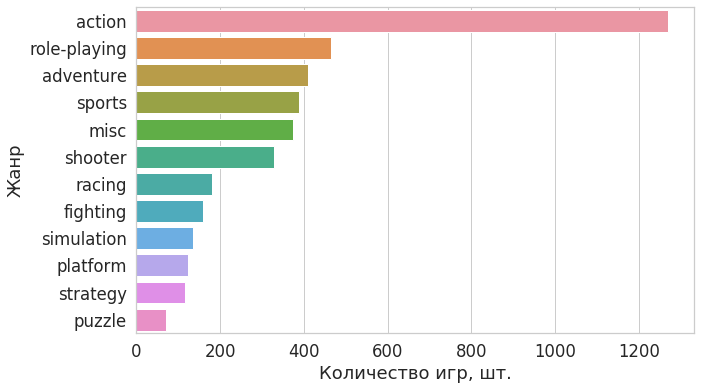

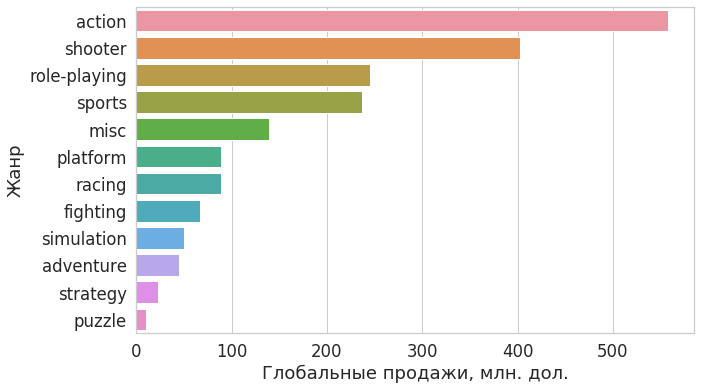

In [20]:
data_actual =  data.query('year_of_release >= 2011')

# Построим график распределния игр по жанрам 

data_genre_c = (data_actual
                 .pivot_table(
                     index = 'genre',
                     values = 'name', 
                     aggfunc = 'count').
                reset_index()).sort_values('name', ascending = False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'name',
                 y = 'genre',
                 data = data_genre_c
                )
plt.ylabel('Жанр')
plt.xlabel('Количество игр, шт.')

# Построим график распределния глобальных продаж игр по жанрам 

data_genre_sales = (data_actual
                 .pivot_table(
                     index = 'genre',
                     values = 'all_sales', 
                     aggfunc = 'sum').
                reset_index()).sort_values('all_sales', ascending = False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'all_sales',
                 y = 'genre',
                 data = data_genre_sales
                )
plt.ylabel('Жанр')
plt.xlabel('Глобальные продажи, млн. дол.')

#### Вывод: 

Как видно из графика - пирога больше всего игр (ТОП-5) выпускается в жанрах:

1. action         
2. role-playing     
3. adventure        
4. sports          
5. misc  

Что же касается продаж игры по жанрам(прибыльности жанров) ТОП-5 по прибыльности распределен следующим образом: 

1. action         
2. shooter         
3. role-playing    
4. sports          
5. misc           

И можно посмотреть АнтиТОП - 5 по продажам(самы енеприбыльные жанры)

1. puzzle           
2. strategy         
3. platform         
4. simulation      
5. fighting         

Разрабатывать игры в этих жанрах неблагодарное дело

## Составим портрет пользователя каждого региона( NA, EU, JP) 

### Самые популярные платформы по регионам

Создадим таблицу данных по платформам в различных регионах за актуальный период и построим графики:

Text(0, 0.5, 'Продажи')

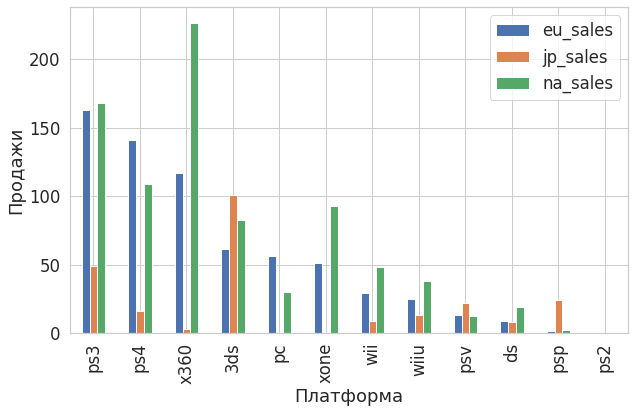

In [21]:
data_platform_sales = (
    data_actual
    .pivot_table(index = 'platform',
                 values = ['eu_sales','na_sales','jp_sales'],
                aggfunc = 'sum')
    .sort_values('eu_sales',
                ascending = False)).reset_index()

data_platform_sales.plot.bar(
   x='platform',
    figsize = (10,6), grid = True)


plt.xlabel('Платформа')
plt.ylabel('Продажи')

#### Вывод:

Как видно из графика, Европе ТОП - 5 платформ распределился следующим образом: 

1.  ps3	
2.	ps4	
3.	x360	
4.	3ds	
5.	pc	

В Америке ТОП - 5 платформ  имеет следующие значения: 


1.  x360
2.	ps3	
3.	ps4	
4.	xone	
5.	3ds	

А вот в Японии, ситуация несколько иная, их ТОП - 5 выглядит следующим образом: 

1. 3ds	
2. ps3
3. psp
4. psv
5. ps4


Самое интересное, что приставки от Sony, в родной Японии уступают приставкам от компании Nintendo? также впрочем, как и в Америке, а вот в Европе приставки от Sony любят больше) 

### Самые популярные жанры игр по регионам

Составим аналогичную вышеприведенной таблице, только проведем группировку по жанру и построим графики:



Text(0, 0.5, 'Продажи')

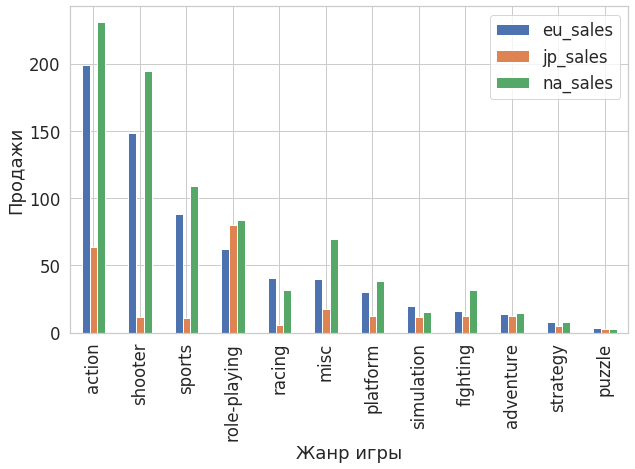

In [22]:
data_genre_sales = (
    data_actual
    .pivot_table(index = 'genre',
                 values = ['eu_sales','na_sales','jp_sales'],
                aggfunc = 'sum')
    .sort_values('eu_sales',
                ascending = False)).reset_index()

data_genre_sales.plot.bar(
   x='genre',
    figsize = (10,6), grid = True)


plt.xlabel('Жанр игры')
plt.ylabel('Продажи')

#### Вывод:

Как видно из графика,  Европе ТОП - 5 жанров распределился следующим образом: 

1.  action
2.	shooter
3.	sports	
4.	role-playing
5.	racing

В Америке ТОП - 5 жанров имеет следующие значения: 


1.  action
2.	shooter	
3.	sports	
4.	role-playing	
5.	misc

А вот в Японии, ситуация несколько иная, их ТОП - 5 выглядит следующим образом: 

1. role-playing	
2. action
3. misc
4. fighting	
5. platform	

Как видно из графиков, в Европе любят экшн, шутеры и спортивные, ролевые и гонки, в Америке же первые 4 строчки совпадают с Европой, а вот 5 строчка отдана непонятному жанру Misc. 

Япония же стоит особняком. Первую строчку там занимают ролевые игры, вторую экшн, третью непонятный жанр misc. На четвертой строчке стоит файтинг(сказывается популярность в японской культуре различных единоборств), ну и  замыкают рейтинг платформеры. 

### Проверим влияет ли ESRB рейтинг на продажи в разных регионах? 

Для этого построим график распредения продаж исходя из значений рейтинга ESRB, для этого создадим сводную таблицу:  

Text(0.5, 0, 'Рейтинг ESRB')

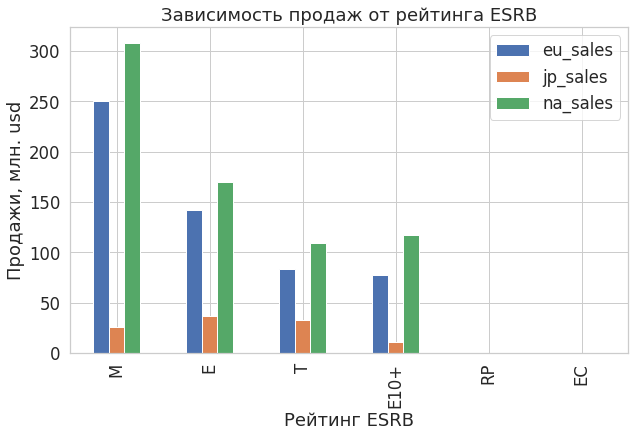

In [23]:
data_rating_sales = (
    data_actual
    .pivot_table(index = 'rating',
                 values = ['eu_sales','na_sales','jp_sales'],
                aggfunc = 'sum')
    .sort_values('eu_sales',
                ascending = False).reset_index())

data_rating_sales.plot.bar(
   x='rating',
    figsize = (10,6), grid = True)

plt.title('Зависимость продаж от рейтинга ESRB')
plt.ylabel('Продажи, млн. usd')
plt.xlabel('Рейтинг ESRB')


#### Вывод: 

В Европе и Америке ТОП- 3 по продажам всего продаются игры 17+, игры для всех и , в Японии же лидируют игры для всех, игры для подростков старше 13 лет и игры 17+. Это говорит о том, что в Японии в компьютерные игры играют больше подростков и молодых людей, в Европе и Америке же в игры играют все возрастные группы. 

Отдельно же надо отметить, что продажи в зависимости от рейтинга расположились в 4 значениях из 6. Игры с рейтингом EC для детей младшего возраста практически не продаются, также игры у которых рейтинг ожидается (RP) отсутствуют на графике, либо же таких игр настолько мало, что их суммарные продажи практически не видны на графике.  

## Проверка гипотез

### Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для этого сначала сформируем нулевую и альтернативные гипотезы:

Нулевая гипотеза(H0) будет звучать так: "Средние пользовательские рейтинги платформ Xbox One и PC равны". Альтернативная гипотеза (H1) будет звучать так: "Средние пользовательские рейтинги платформ Xbox One и PC не равны". 

In [24]:
data_actual_xone = data_actual.query('platform == "xone"')
data_actual_pc = data_actual.query('platform == "pc"')

alpha = .05 #зададим общепринятый порог 

results = st.stats.ttest_ind(
    data_actual_xone['user_score'],
    data_actual_pc['user_score'], 
    equal_var = False, nan_policy = 'omit')

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6130712247637622
Не получилось отвергнуть нулевую гипотезу


#### Вывод: 

У нас не получилось отвергнуть нулевую гепотезу, что дает основание ее рассматривать. Звучит она так:  "Средние пользовательские рейтинги платформ Xbox One и PC равны"

### Проверим гипотезу, что средние пользовательские рейтинги жанров action и sports разные

Для этого сначала сформируем нулевую и альтернативные гипотезы:

Нулевая гипотеза(H0) будет звучать так: "Средние пользовательские рейтинги жанров action и sports равны". Альтернативная гипотеза (H1) будет звучать так: "Средние пользовательские рейтинги жанров action и sports не равны".

In [25]:
data_actual_action = data_actual.query('genre == "action"')
data_actual_sports = data_actual.query('genre == "sports"')

alpha = .05 #зададим общепринятый порог 

results = st.stats.ttest_ind(
    data_actual_action['user_score'],
    data_actual_sports['user_score'], 
    equal_var = False, nan_policy = 'omit')

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.285648549430888e-19
Отвергаем нулевую гипотезу


#### Вывод: 

Мы отвергнули нулевую гепотезу, что дает основание рассматривать альтернативную. Которая звучит так:  "Средние пользовательские рейтинги жанров action и sports не равны"

## Общий вывод:

Мы провели изучение рынка компьютерных игр, выявили множество интересных закономерностей, которые позволяют нам спрогнозировать продажи в дальнейшем, перераспределить рекламные бюджеты в сторону наиболее перспективных продуктов. 

Вот основные закономерности полученные в результате исследования: 

1. Информация о играх имеет ценность лищь за актуальный период равный 5 годам. 

2. Расцвет игровой индустрии пришелся на период с 2006 по 2011 годы, когда выпускалось более 1000 игр в год.Затем произошло значительное снижение, это скорее всего связано с развитием мобильных технологий и игрового сегмента на гаджетах
   
3. Самые прибыльные платформы по продажам ps2, xbox 360  и ps3

4. Средний срок жизни платформы равен 10 годам, однако же это не относится к персональным компьютерам, игры на этой платформе выходят с завидным постоянством. И хотя они продаются не в таких объемах как на приставках, но зато уже несколько дисятилетий. 
  
5. Для определения прибыльности платформ необходимо оценить медианные значения продаж, которые показывают неожданные результаты. 

6. Наибольшие продажи ждут игры с пользовательским рейтингом от 7 до 8,5 баллов

7. Самые прибыльные жанры для игр - action, shooter, role-playing, sports, misc

8. Популярность платформ значительно различается в зависимости от региона мира

9. Популярность жанров по регионам тоже значительно отличаются. Япония стоит особняком. 

10. Возрастные группы игроков Японии и Европы с Америкой отличаются. Там популярны игры с разным рейтинга ESRB

11. При проверке гипотез. У нас не получилось отвергнуть гипотезу, что "Средние пользовательские рейтинги платформ Xbox One и PC равны", а также мы отвергли гипотезу, что "Средние пользовательские рейтинги жанров action и sports равны" 

Полученные данные позволяют нам делать прогнозы относительно того, на каких играх, жанрах, платформах и регионах нужно сосредоточить основные усилия в продажах и рекламе. 

